# Log-Log functional form (Example 1)

### Intro and objectives
#### Understand the application of logarithmic functional forms in linear regression models

### In this lab you will learn:
1. examples of log-log functional forms applied to simple regression models.
2. how to fit simple regression models in Python.


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit a non-linear regression model.
* How to interpret the results obtained

In [43]:
!pip install wooldridge
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Example 1. CEO salary and firm sales



#### To study the relationship between CEO's compensation and firm sales, we postulate the following model:

$ log(salary)=\beta_0+\beta_1*log(sales)+u $



### Using the data in ceosal1 where n=209 individuals

In [44]:
salaries = woo.dataWoo('ceosal1')


In [45]:
salaries.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


In [46]:
salaries.describe()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1281.119617,13.282297,6923.793282,17.184211,10.800478,61.803828,0.320574,0.220096,0.287081,0.172249,6.950386,8.292265
std,1372.345308,32.633921,10633.271088,8.518509,97.219399,68.177052,0.467818,0.415306,0.453486,0.378503,0.566374,1.013161
min,223.000000,-61.000000,175.199997,0.500000,-98.900002,-58.000000,0.000000,0.000000,0.000000,0.000000,5.407172,5.165928
25%,736.000000,-1.000000,2210.300049,12.400000,-21.200001,21.000000,0.000000,0.000000,0.000000,0.000000,6.601230,7.700883
50%,1039.000000,9.000000,3705.199951,15.500000,-3.000000,52.000000,0.000000,0.000000,0.000000,0.000000,6.946014,8.217492
75%,1407.000000,20.000000,7177.000000,20.000000,19.500000,81.000000,1.000000,0.000000,1.000000,0.000000,7.249215,8.878636
max,14822.000000,212.000000,97649.898438,56.299999,977.000000,418.000000,1.000000,1.000000,1.000000,1.000000,9.603868,11.489144


In [47]:
type(salaries)

pandas.core.frame.DataFrame

In [48]:
# We impose a simple, linear, model: 
# We specify CeoSalaries as the empirical dataset

reg = smf.ols(formula='np.log(salary) ~ np.log(sales)', data=salaries)

In [49]:
# We fit the model
results = reg.fit()


In [50]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept        4.821996
np.log(sales)    0.256672
dtype: float64



## Based on the previous we have fitted the following model:

$ log(salary)=4.822+0.2567*log(sales)+u $


## How do we interpret the equation?

#### The coefficient of log(sales) is the estimated elasticity of salary with respect to sales. It implies that a 1% increase in firm sales increases CEO salary by about 0.2567%.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


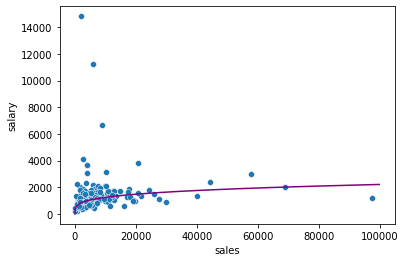

In [53]:
sns.scatterplot(data=salaries, x='sales',y='salary')


educationValues=[item for item in range(0,100000,100)]

yHat=[np.exp(4.822+0.25*np.log(item)) for item in range(0,100000,100)]

sns.lineplot(educationValues, yHat,color='purple')


#### We observe from the previous graph that the model is non-linear as expected given the non-linear component we specified